In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

rng = np.random.default_rng()

In [26]:
# Draw Nsamp points (xi, yi) from the box [0,1]x[0,1]
Nsamp = 10000
x = rng.random(size=Nsamp)
y = rng.random(size=Nsamp)
z = rng.random(size=Nsamp)
a=rng.random(size=Nsamp)
b=rng.random(size=Nsamp)
c=rng.random(size=Nsamp)
d = rng.random(size=Nsamp)
e= rng.random(size=Nsamp)
f=rng.random(size=Nsamp)
g=rng.random(size=Nsamp)
h=rng.random(size=Nsamp)

# Check which point falls within the quarter circle r=1 i.e.,
# sqrt(x^2 + y^2) <= 1. Numpy automatically does this 
# element-wise and will return a boolean array

r = np.sqrt(g**2 + a**2 + h**2 + b**2+ c**2 + d**2 +e**2+ f**2 + x**2 + y**2 + z**2)
is_inside = (r <= 1)

# Taking the sum of the boolean array returns how many True
# is inside. Thus, the fraction of True's from the drawn points is:
inside_ratio = np.sum(is_inside)/Nsamp

# What is 4 times this ratio?
print(inside_ratio/np.pi)
print(inside_ratio)


0.00022281692032865349
0.0007


#Notes: October 29 
##Monte Carlo Sampling
*   make random points
*   check which points lie inside and outside the circle
*   4 times the ratio = pi, which makes sense since the quarter unit circle has area $\pi/4$ 

##Importance Sampling
Quadrature: 
*   suppose that the integral can be written as some function times a probabilit density
*   solve for the functino f(x) 
*   Sample some x then solve f(x) for that x
*   Get the expectation value of f(x), or essentially the average

C:\Users\chyne\AppData\Local\Temp\ipykernel_1136\1352666769.py:7: RuntimeWarning: invalid value encountered in divide
  return (x**2 + x)/np.sqrt(x) * np.exp(-x)


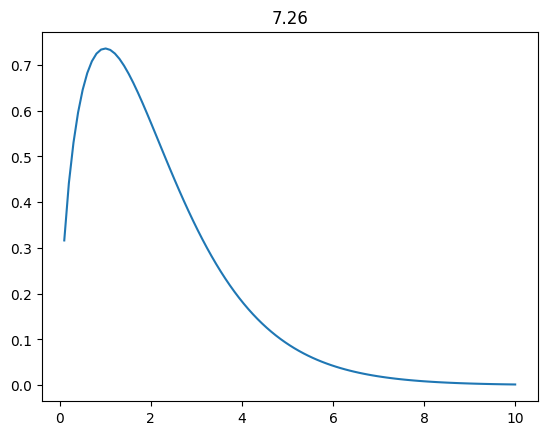

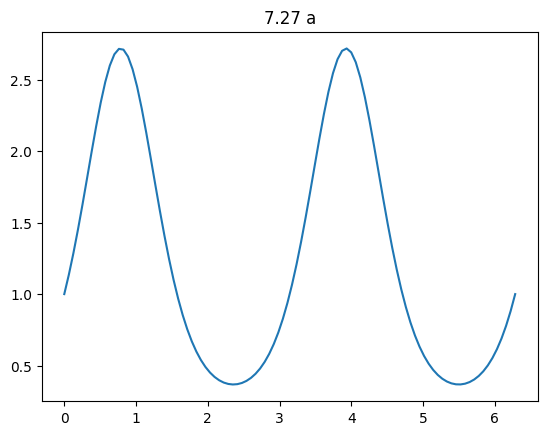

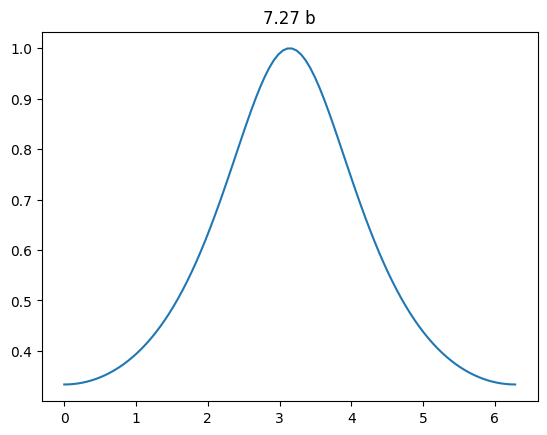

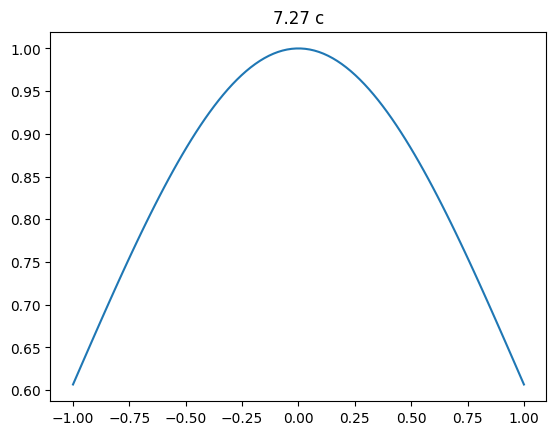

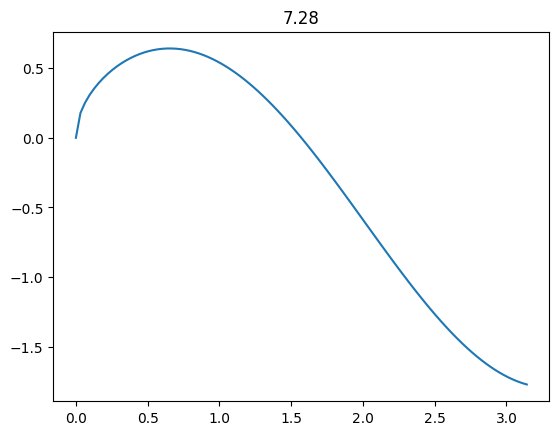

In [44]:
#Let me write down all the functions first 
x_26 = np.linspace(0 , 10, 100)
x_27_a = np.linspace(0, 2*np.pi, 100)
x_27_c = np.linspace(-1, 1, 100)
x_28 = np.linspace(0, np.pi, 100)
def f_26(x):
    return (x**2 + x)/np.sqrt(x) * np.exp(-x)

def f_27_a(x):
    return np.exp(np.sin(2*x))

def f_27_b(x):
    return 1 / (2 + np.cos(x))

def f_27_c(x):
    return np.exp(-x**2 /2)

def f_28(x):
    return np.sqrt(x)*np.cos(x)

#Visulalize
plt.plot(x_26, f_26(x_26))
plt.title("7.26")
plt.show()

plt.plot(x_27_a, f_27_a(x_27_a))
plt.title("7.27 a")
plt.show()

plt.plot(x_27_a, f_27_b(x_27_a))
plt.title("7.27 b")
plt.show()

plt.plot(x_27_c, f_27_c(x_27_c))
plt.title("7.27 c")
plt.show()

plt.plot(x_28, f_28(x_28))
plt.title("7.28")
plt.show()

In [47]:
#Monte Carlo Integration
#7.26

x_samp = np.linspace(0, 10, 2**7)

def p(x):
    return np.exp(-x)

def cumdist(f,x):
    return np.cumsum(f(x)) / np.sum(f(x))

from scipy import interpolate
inverse_cumdist = interpolate.interp1d(cumdist(p,x_samp), x_samp)

N = 100
xs = rng.uniform(min(cumdist(p,x_samp)), max(cumdist(p,x_samp)), size = N )

def z(x):
    return (x**2 + x) / np.sqrt(x)

print(np.mean(z(inverse_cumdist(xs))))

def F(x):
    return (x**2 + x) / np.sqrt(x) * np.exp(-x)

quad_out, err = integrate.quad(F, min(x_samp), max(x_samp))
print(quad_out)

2.0947812963670973
2.2137555660034107
